In [5]:
import numpy as np
from numpy import sum as arraysum
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [6]:
df=pd.read_csv("Z:\Tech Development\Tech Development projects\EM-089 Application Of Arrhenius Equation - for HbA1c products\July\ASLT_7097a.csv")

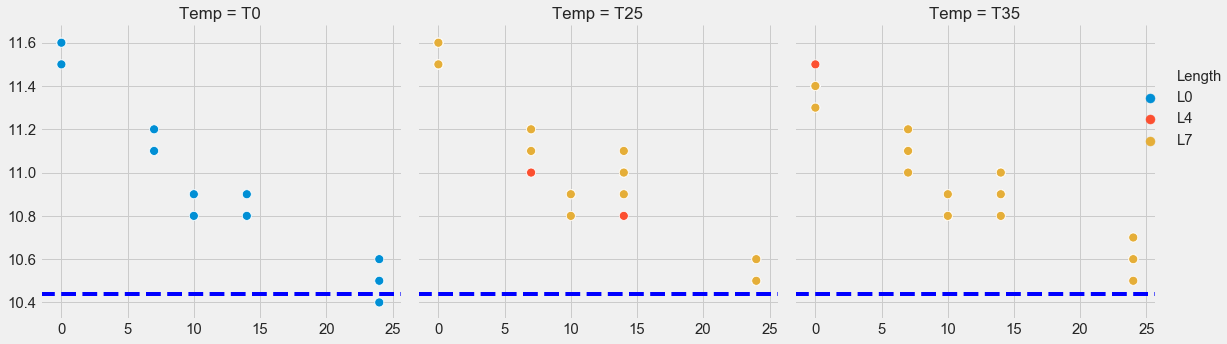

In [40]:
sns.set(rc={'figure.figsize':(20,20)}) 
sns.set_context('talk', font_scale=0.9) 
sns.set_style('ticks')
plt.style.use('fivethirtyeight')
g=sns.relplot(data=df, x='Day', y='Conc',col='Temp', hue='Length')
g.set_xlabels("Day",fontweight='bold', size=8)
g.set_ylabels("HbA1c Levels",fontweight='bold', size=10)
leg = g._legend
leg.set_bbox_to_anchor([1,0.8])
leg._loc = 9  # if required you can set the loc
g.map(plt.axhline, y=10.44, ls="--", c="blue")
g.savefig("7097_14a")


sns.set(rc={'figure.figsize':(20,20)}) 
sns.set_context('talk', font_scale=1) 
sns.set_style('ticks')
g.savefig("7097_24")

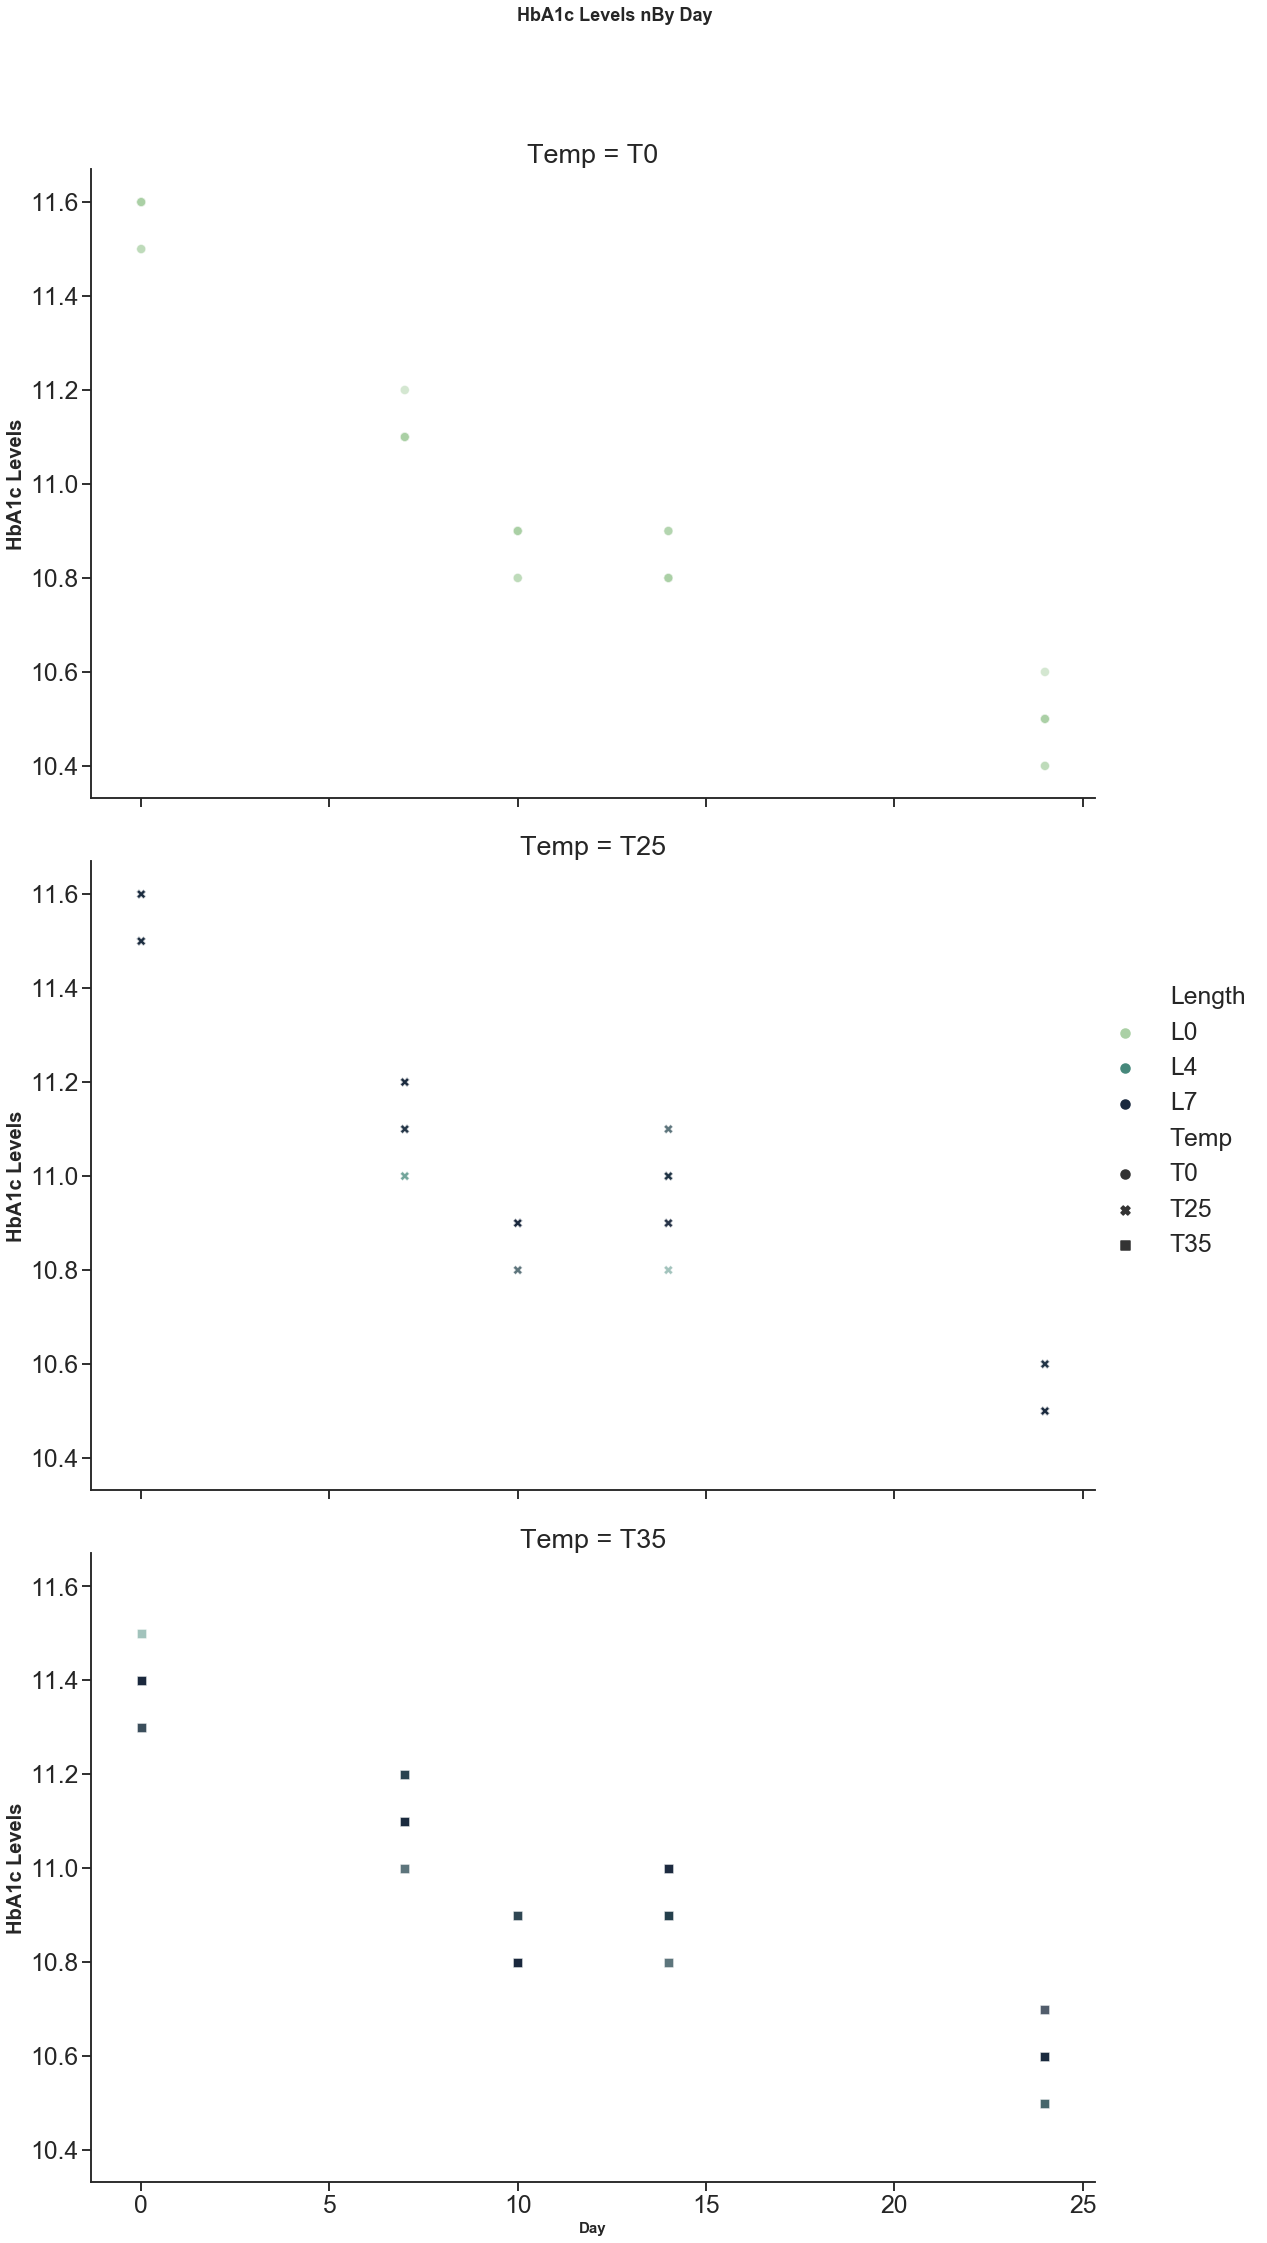

In [11]:
sns.set(rc={'figure.figsize':(20,20)}) 
sns.set_context('talk', font_scale=1.5) 
sns.set_style('ticks')
g = sns.relplot(x='Day', y='Conc', hue='Length', data=df, row = 'Temp',
                kind='scatter', legend='brief', palette="ch:r=-.5,l=.75",
                height=10, aspect=1.6, alpha=0.5,style='Temp', sizes=(2000,1500))

g.fig.suptitle('HbA1c Levels nBy Day' ,position=(0.5,1.05), fontweight='bold', size=18)
g.set_xlabels("Day",fontweight='bold', size=15)
g.set_ylabels("HbA1c Levels",fontweight='bold', size=20);

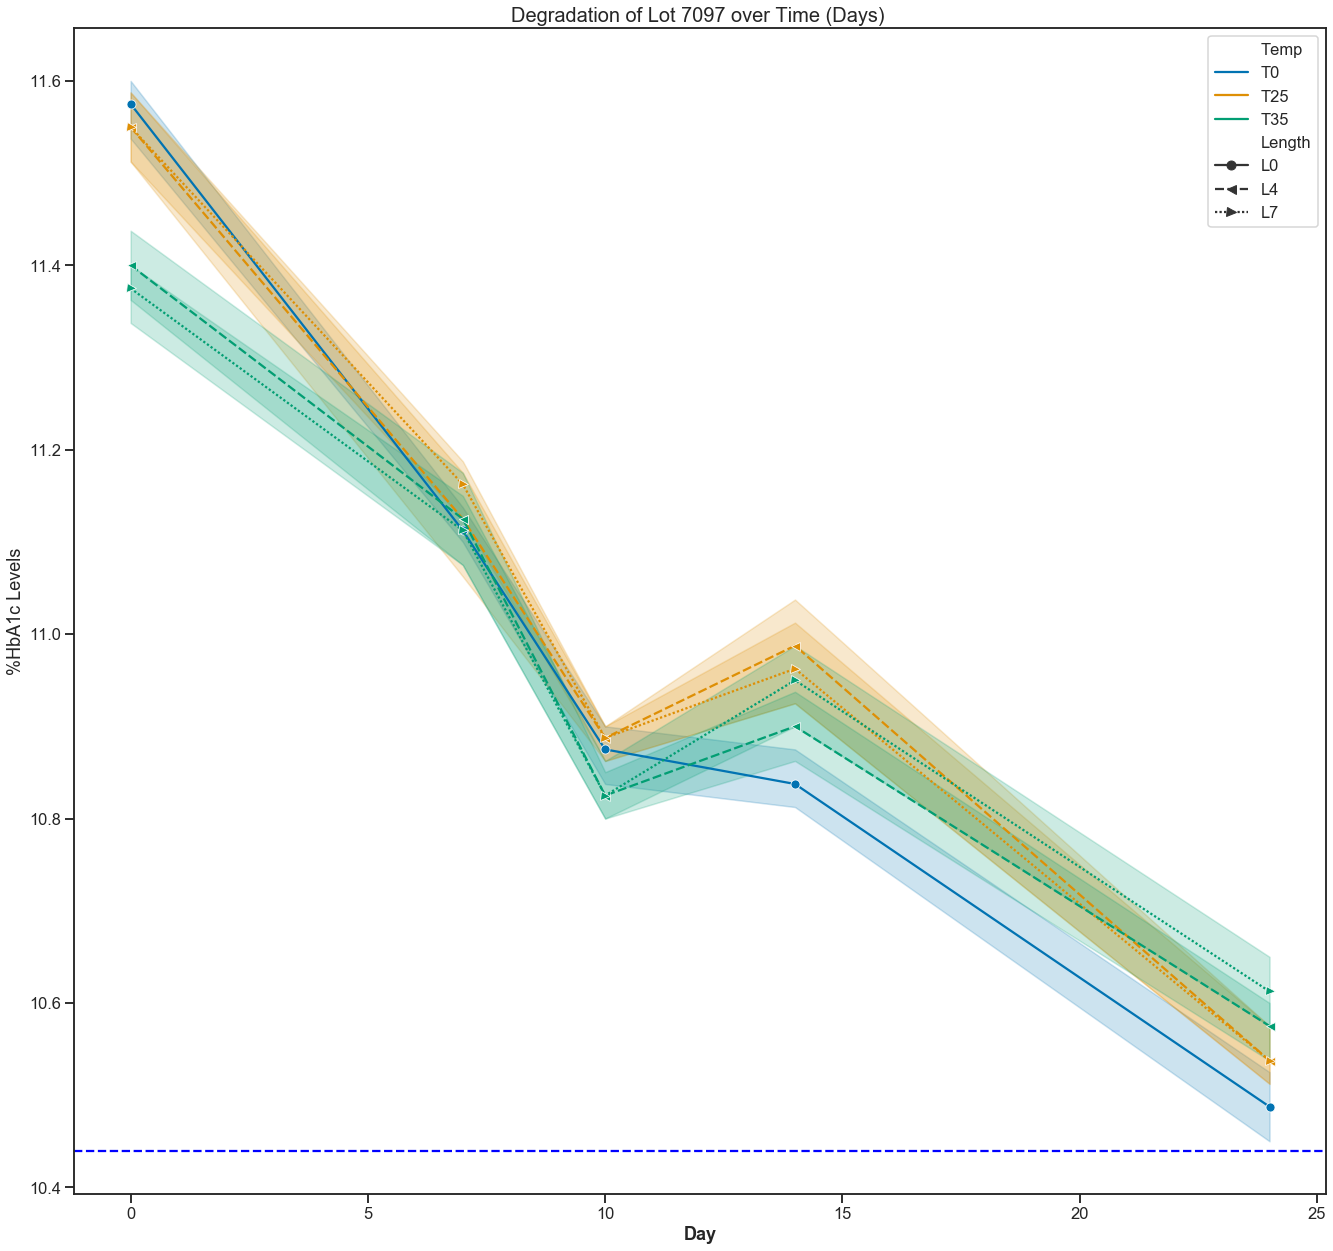

In [60]:
g=sns.lineplot(x = "Day", y = "Conc", data = df, hue = "Temp",
             style = "Length", palette = "colorblind", dashes = True, 
            markers = ["o", "<", ">"],  legend="brief",)
 
plt.title("Degradation of Lot 7097 over Time (Days) ", fontsize = 20) # for title
plt.xlabel("Day", fontweight='bold', fontsize = 18) # label for x-axis
plt.ylabel("%HbA1c Levels", fontsize = 18) # label for y-axis

plt.axhline (y=10.44, ls="--", c="blue")
plt.savefig("7097_24a")
plt.show();

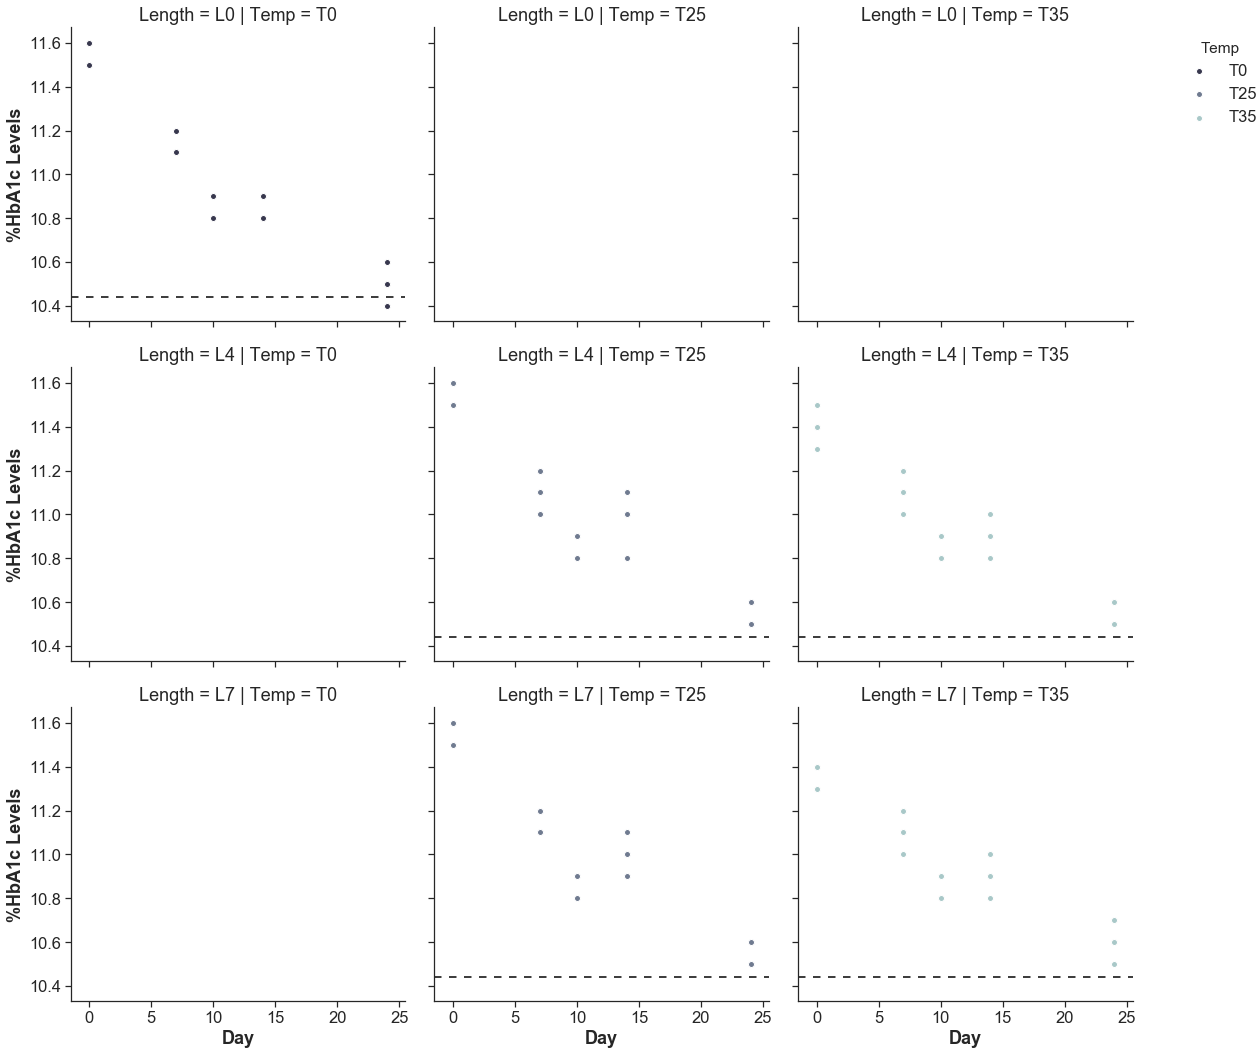

In [25]:
sns.set(style="ticks", color_codes=True, font_scale =1.5)
g = sns.FacetGrid(df, col="Temp",  hue='Temp',row='Length', height=5, palette="bone")
g = g.map(plt.scatter, "Day", "Conc", edgecolor="w").add_legend()
leg = g._legend
leg.set_bbox_to_anchor([1,0.9])
leg._loc = 6
g.map(plt.axhline, y=10.44, ls=(0, (5, 5)), c="black")
sns.set(rc={'figure.figsize':(20,20)}) 
sns.set_context('talk', font_scale=1.0) 
sns.set_style('ticks')
sns.despine()
g.set_xlabels("Day",fontweight='bold', size=18)
g.set_ylabels("%HbA1c Levels",fontweight='bold', size=18)
g.savefig("7097_wrap");

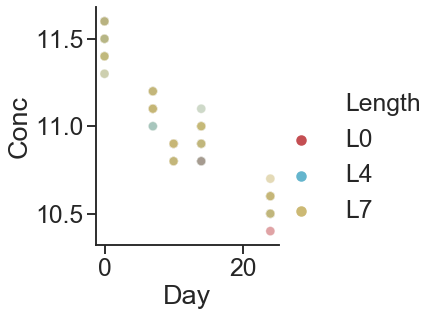

In [31]:
sns.relplot(x="Day", y="Conc", hue="Length",alpha=0.3,
              palette=["r", "c", "y"], data=df);

In [ ]:
sns.set(style="ticks", color_codes=True, font_scale =1.5)
g = sns.FacetGrid(df, col="Temp",  col_wrap=3, hue='Length', height=5, palette="Set1")
g = g.map(plt.scatter, "Day", "Conc", edgecolor="w").add_legend()
leg = g._legend
leg.set_bbox_to_anchor([1,0.9])
leg._loc = 6
g.map(plt.axhline, y=10.44, ls=(0, (5, 5)), c="black")
sns.set(rc={'figure.figsize':(20,20)}) 
sns.set_context('talk', font_scale=1.0) 
sns.set_style('ticks')
sns.despine()
g.set_xlabels("Day",fontweight='bold', size=18)
g.set_ylabels("%HbA1c Levels",fontweight='bold', size=18)
g.savefig("7097_wrap");

In [7]:
model = ols('Conc ~ C(Day)*C(Length)*C(Temp)', data=df).fit()

In [8]:
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Day),1.933230e+01,4.0,1.470936e+03,1.744678e-133
C(Length),1.850489e-12,2.0,2.815962e-10,1.000000e+00
C(Temp),-1.536664e-12,2.0,-2.338402e-10,1.000000e+00
C(Day):C(Length),2.420546e-12,8.0,9.208600e-11,1.000000e+00
C(Day):C(Temp),6.547704e-13,8.0,2.490974e-11,1.000000e+00
C(Length):C(Temp),1.063000e-01,4.0,8.088043e+00,5.244819e-06
C(Day):C(Length):C(Temp),4.102000e-01,16.0,7.802717e+00,8.926718e-14
Residual,5.750000e-01,175.0,NaN,NaN


In [10]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Conc   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     251.7
Date:                Mon, 10 Aug 2020   Prob (F-statistic):          1.88e-122
Time:                        16:20:16   Log-Likelihood:                 301.38
No. Observations:                 200   AIC:                            -552.8
Df Residuals:                     175   BIC:                            -470.3
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------